# PCM MODULATION

### Import libraries

In [23]:
import numpy as np
import matplotlib.pyplot as plt

### Input Analog Singnal

In [40]:
sampling_rate = 1000  # Hz
duration = 1.0       # sec
carrier_frequency = 50  # Hz
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)  # Time vector
input_signal = np.sin(2 * np.pi * 5 * t)  # Input signal 5 Hz

### Carrier Singnal (square wave)

In [38]:
def carrier(frequency, sampling_rate, duration):
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    carrier_signal = 0.5 * (1 + np.sign(np.sin(2 * np.pi * frequency * t)))
    return carrier_signal
    
carrier_signal = carrier(carrier_frequency, sampling_rate, duration) # generating carrier signal

### Simple PAM Modulation   VS   Flat-Top PAM Modulation

In [41]:
def Simple_pam(signal, carrier_signal):
    normalized_signal = (signal - np.min(signal)) / (np.max(signal) - np.min(signal))
    pam_signal = normalized_signal * carrier_signal
    return pam_signal
    
pam_signal = Simple_pam(input_signal, carrier_signal)

def flat_top_pam(signal, carrier_frequency, sampling_rate):
    normalized_signal = (signal - np.min(signal)) / (np.max(signal) - np.min(signal))
    flat_top_pam_signal = np.zeros_like(signal)
    period = int(sampling_rate / carrier_frequency)
    for i in range(0, len(signal), period):
        flat_top_pam_signal[i:i + period // 4] = normalized_signal[i]  # Short pulse

    return flat_top_pam_signal

flat_top_pam_signal = flat_top_pam(input_signal, carrier_frequency, sampling_rate)

### PWM Modulation

In [70]:
def pwm(signal, pwm_frequency, sampling_rate):
    pwm_period = int(sampling_rate / pwm_frequency)
    pwm_signal = np.zeros_like(signal)
    
    for i in range(len(signal)):
        duty_cycle = (signal[i] - np.min(signal)) / (np.max(signal) - np.min(signal))
        high_samples = int(duty_cycle * pwm_period)
        
        if i % pwm_period < high_samples:
            pwm_signal[i] = 1
        else:
            pwm_signal[i] = 0
    
    return pwm_signal
pwm_frequency = 100
pwm_signal = pwm(input_signal, pwm_frequency, sampling_rate)

### PFM Modulation

In [27]:
def pfm(signal, carrier_frequency, sampling_rate):
    normalized_signal = (signal - np.min(signal)) / (np.max(signal) - np.min(signal))
    pfm_signal = np.zeros_like(signal)
    phase = 0
    for i in range(len(signal)):
        frequency = carrier_frequency + 40 * normalized_signal[i]
        phase += 2 * np.pi * frequency / sampling_rate
        pfm_signal[i] = 0.5 * (1 + np.sign(np.sin(phase)))
    return pfm_signal
pfm_signal = pfm(input_signal, carrier_frequency, sampling_rate)

### PPM Modulation

In [42]:
def ppm(signal, carrier_frequency, sampling_rate, pulse_width_samples):
    normalized_signal = (signal - np.min(signal)) / (np.max(signal) - np.min(signal))
    ppm_signal = np.zeros_like(signal)
    period = int(sampling_rate / carrier_frequency)
    
    for i in range(len(signal)):
        if i % period == 0:
            shift = int(normalized_signal[i] * period)
            ppm_signal[i + shift:i + shift + pulse_width_samples] = 1

    return ppm_signal
pulse_width_samples = int(0.010 * sampling_rate) # Adjasting the width of the PPM signal's pulses
ppm_signal = ppm(input_signal, carrier_frequency, sampling_rate, pulse_width_samples)

### Plotting signals

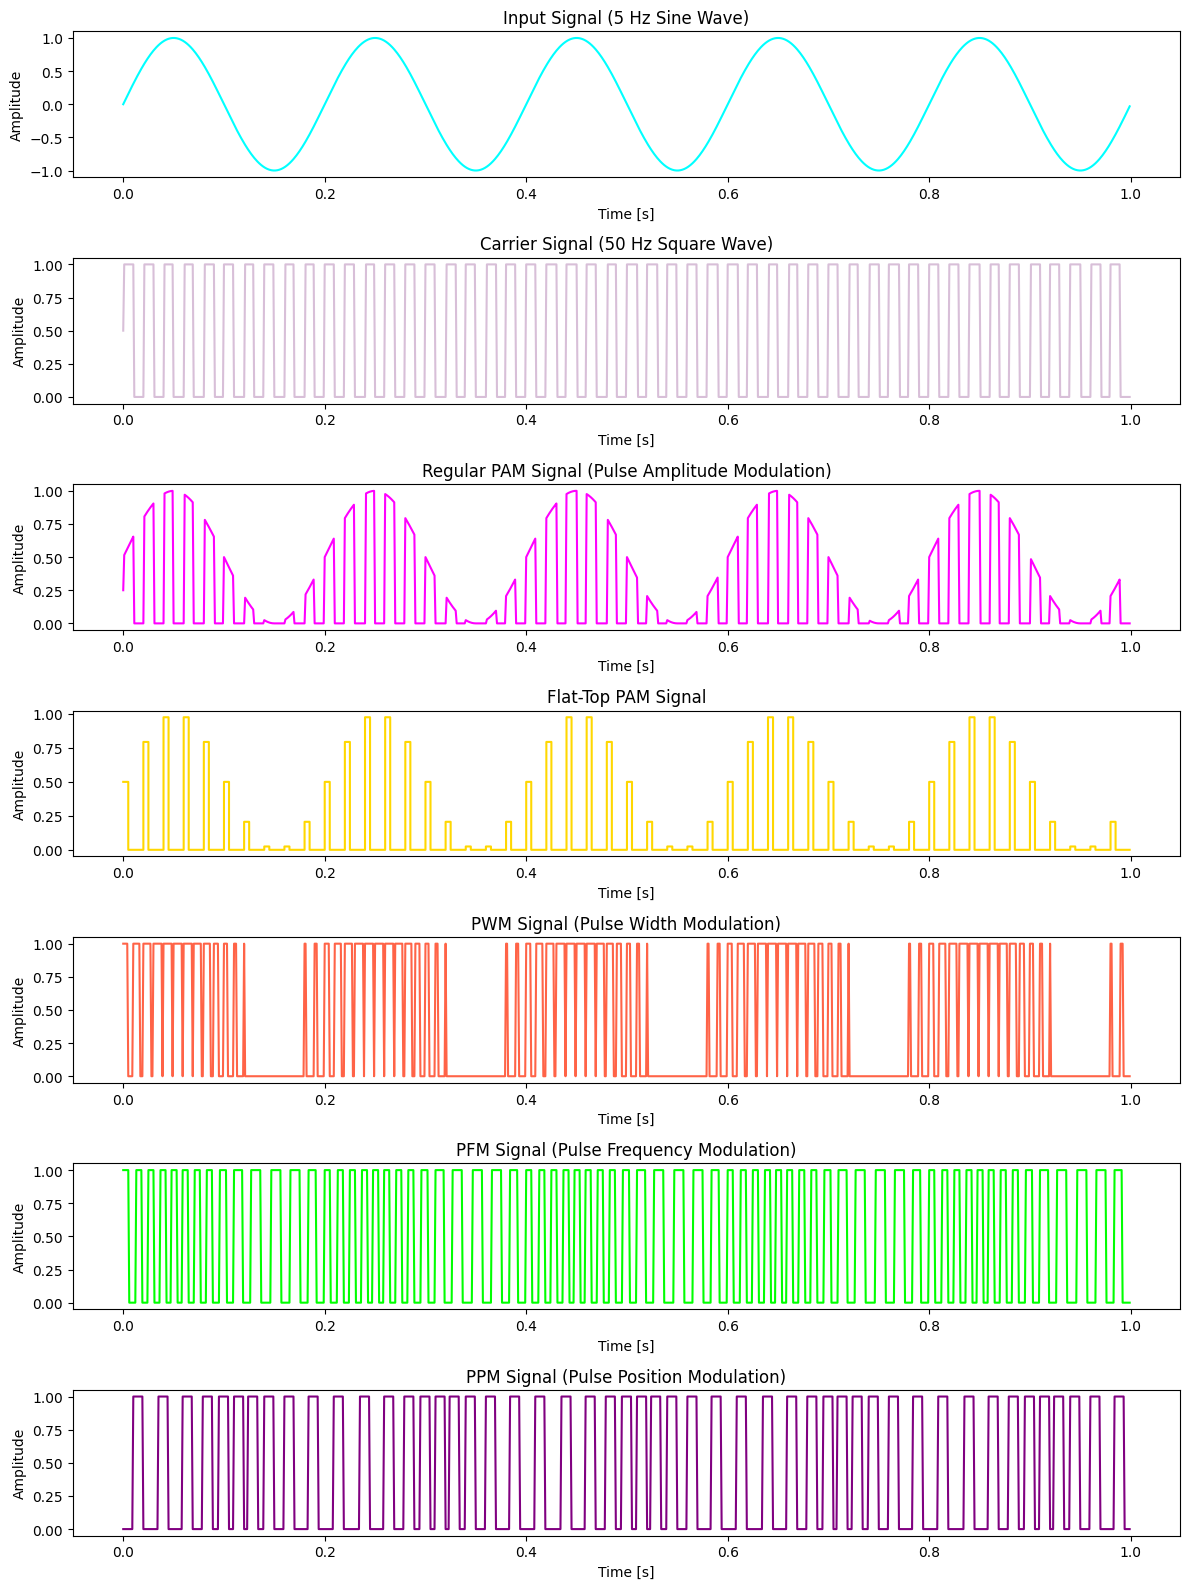

In [79]:
# Plotting
plt.figure(figsize=(12, 16))

# Input Signal
plt.subplot(7, 1, 1)
plt.plot(t, input_signal, color='aqua') 
plt.title("Input Signal (5 Hz Sine Wave)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

# Carrier Signal
plt.subplot(7, 1, 2)
plt.plot(t, carrier_signal, color='Thistle') 
plt.title("Carrier Signal (50 Hz Square Wave)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

# Regular PAM Signal
plt.subplot(7, 1, 3)
plt.plot(t, pam_signal, color='magenta') 
plt.title("Regular PAM Signal (Pulse Amplitude Modulation)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

# Flat-Top PAM Signal
plt.subplot(7, 1, 4)
plt.step(t, flat_top_pam_signal, where='post', color='Gold') 
plt.title("Flat-Top PAM Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

# PWM Signal
plt.subplot(7, 1, 5)
plt.plot(t, pwm_signal, color='Tomato')
plt.title("PWM Signal (Pulse Width Modulation)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

# PFM Signal
plt.subplot(7, 1, 6) 
plt.plot(t, pfm_signal, color='Lime')
plt.title("PFM Signal (Pulse Frequency Modulation)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

# PPM Signal
plt.subplot(7, 1, 7)
plt.plot(t, ppm_signal, color='purple') 
plt.title("PPM Signal (Pulse Position Modulation)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()